In [2]:
 #Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib

In [19]:
df = pd.read_csv("forestfires.csv")
print(df.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None


In [21]:
print(df.describe())

                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655

In [6]:
# Check total missing values per column
print(df.isnull().sum())

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [22]:
df.shape

(517, 13)

In [23]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

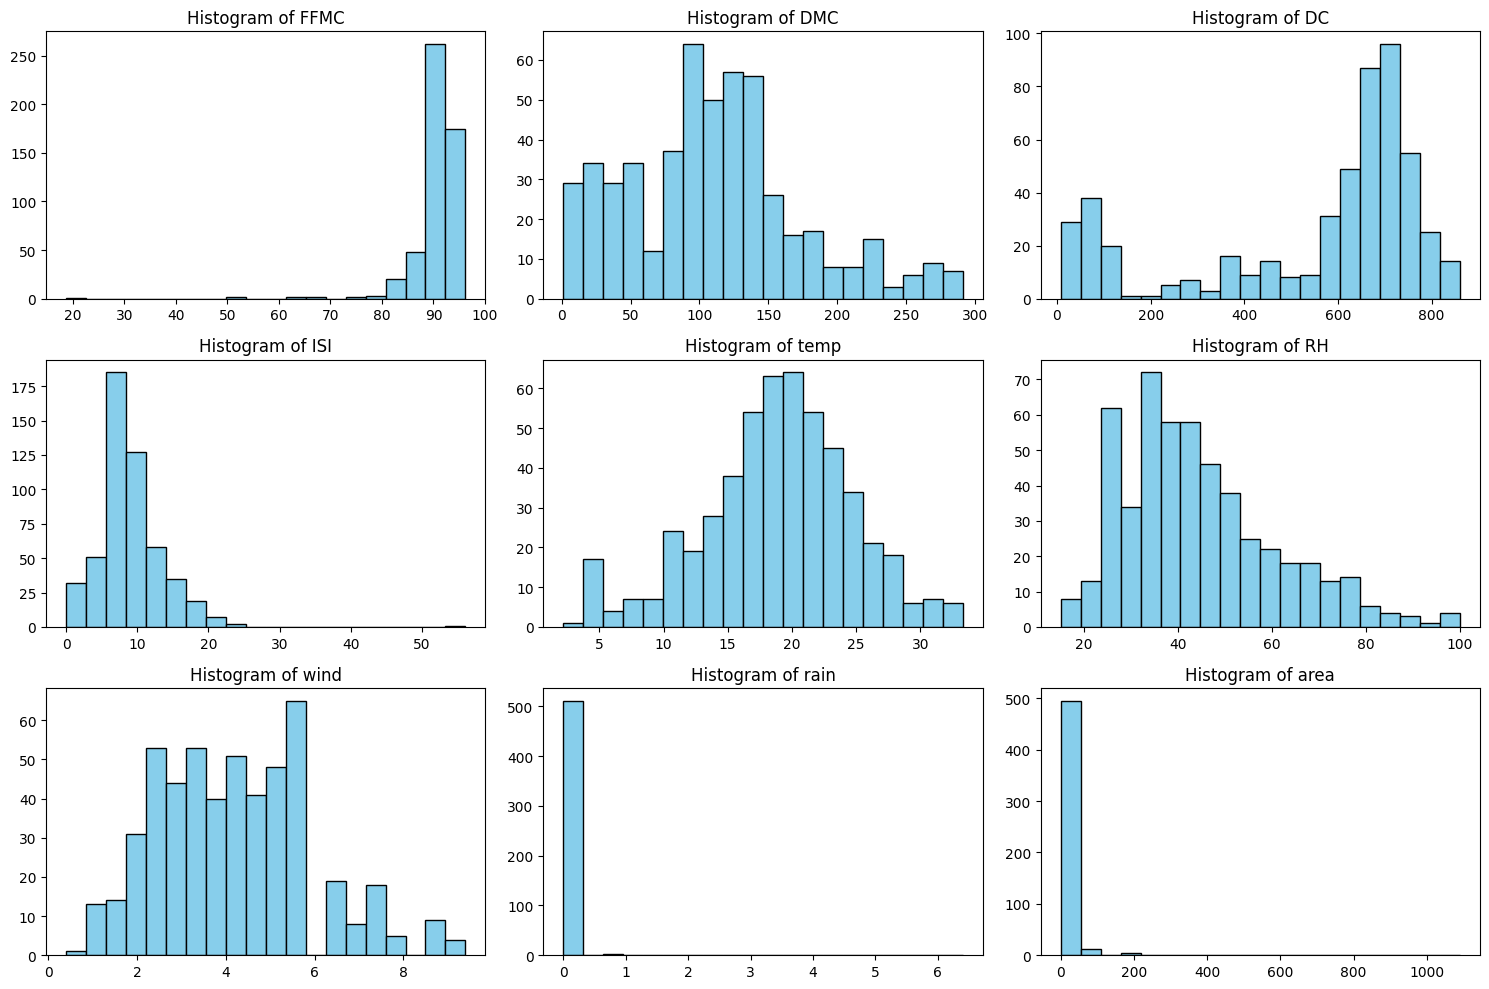

In [9]:
#univariate analysis 
numeric_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


In [10]:
# 1 = fire occurred (area > 0), 0 = no fire
df['fire'] = (df['area'] > 0).astype(int)

# Check if it worked
print(df[['area','fire']].head())

   area  fire
0   0.0     0
1   0.0     0
2   0.0     0
3   0.0     0
4   0.0     0


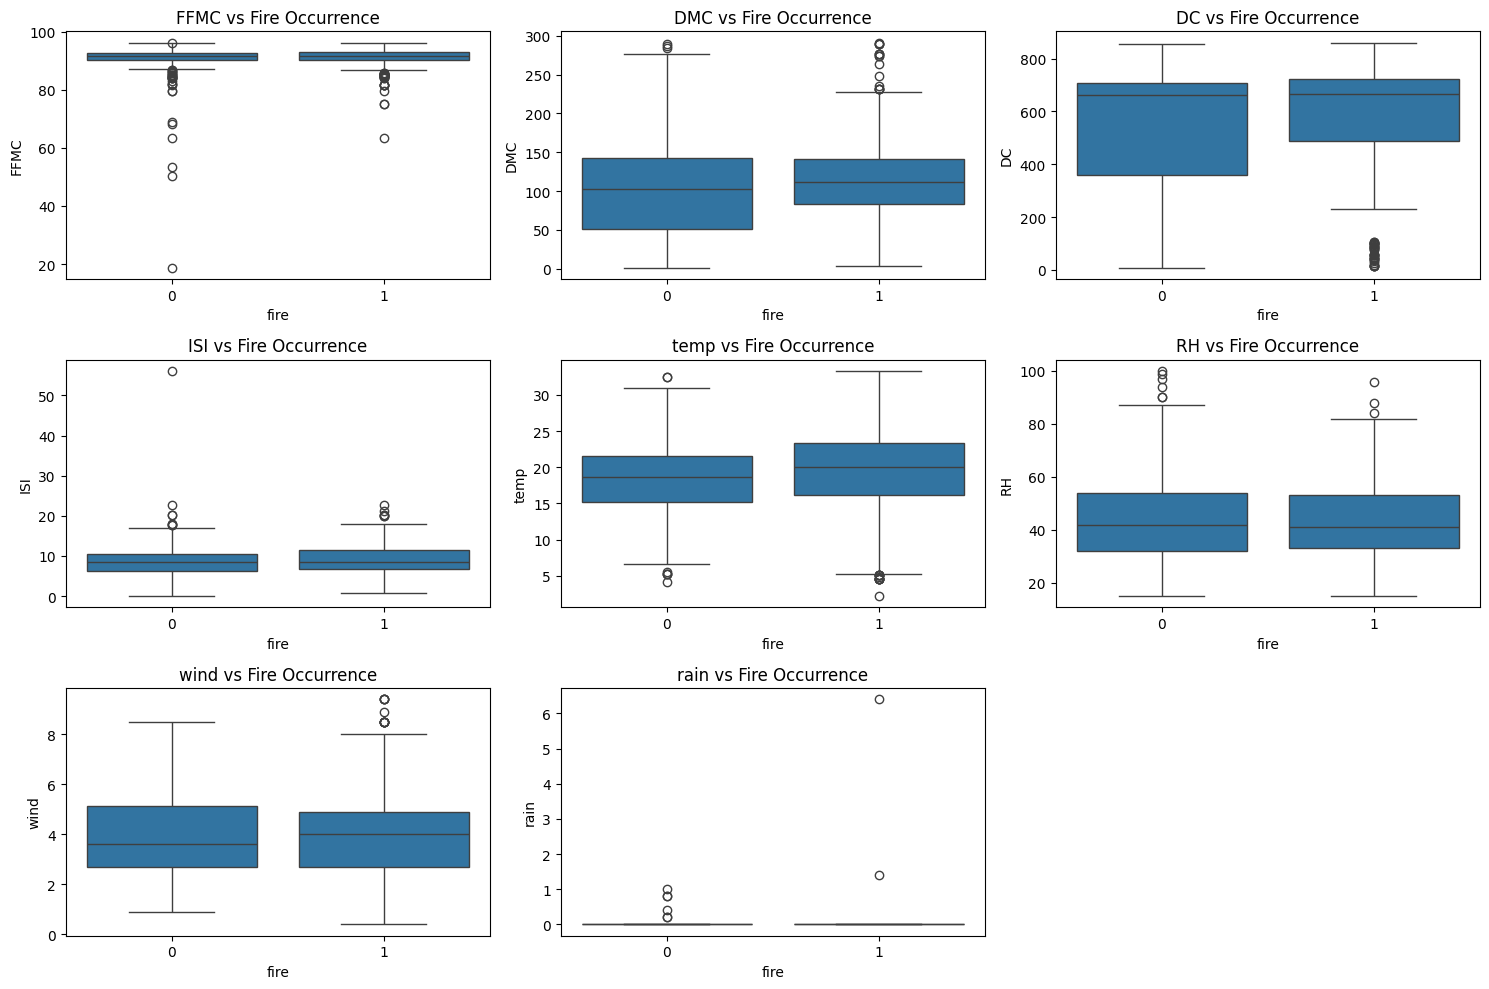

In [11]:
numeric_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(x='fire', y=col, data=df)
    plt.title(f'{col} vs Fire Occurrence')
plt.tight_layout()
plt.show()


          FFMC       DMC        DC       ISI      temp        RH      wind  \
FFMC  1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995 -0.028485   
DMC   0.382619  1.000000  0.682192  0.305128  0.469594  0.073795 -0.105342   
DC    0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192 -0.203466   
ISI   0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517  0.106826   
temp  0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390 -0.227116   
RH   -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000  0.069410   
wind -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410  1.000000   
rain  0.056702  0.074790  0.035861  0.067668  0.069491  0.099751  0.061119   
area  0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519  0.012317   

          rain      area  
FFMC  0.056702  0.040122  
DMC   0.074790  0.072994  
DC    0.035861  0.049383  
ISI   0.067668  0.008258  
temp  0.069491  0.097844  
RH    0.099751 -0.075519  
wind  0.061119  0.012317  
rai

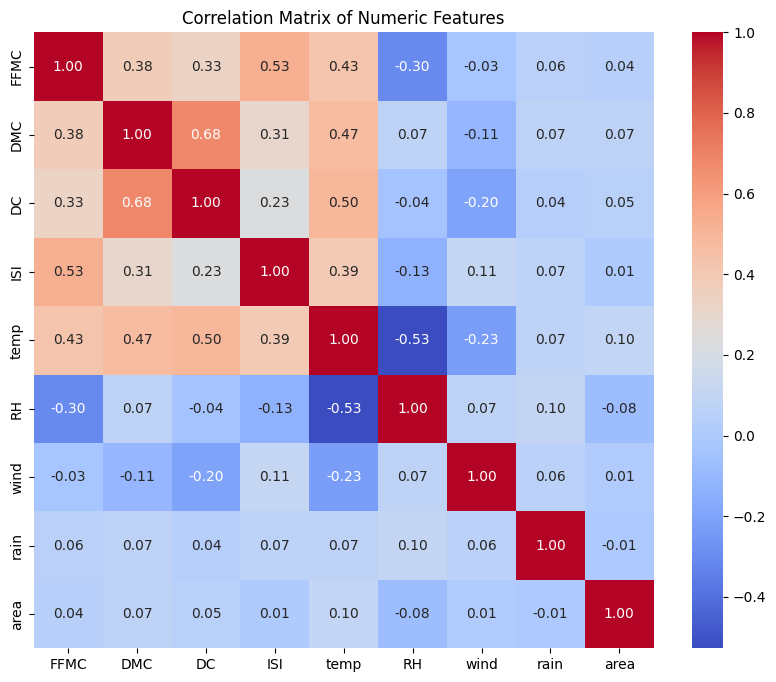

In [12]:
# Select numeric features
numeric_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Print correlation matrix
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


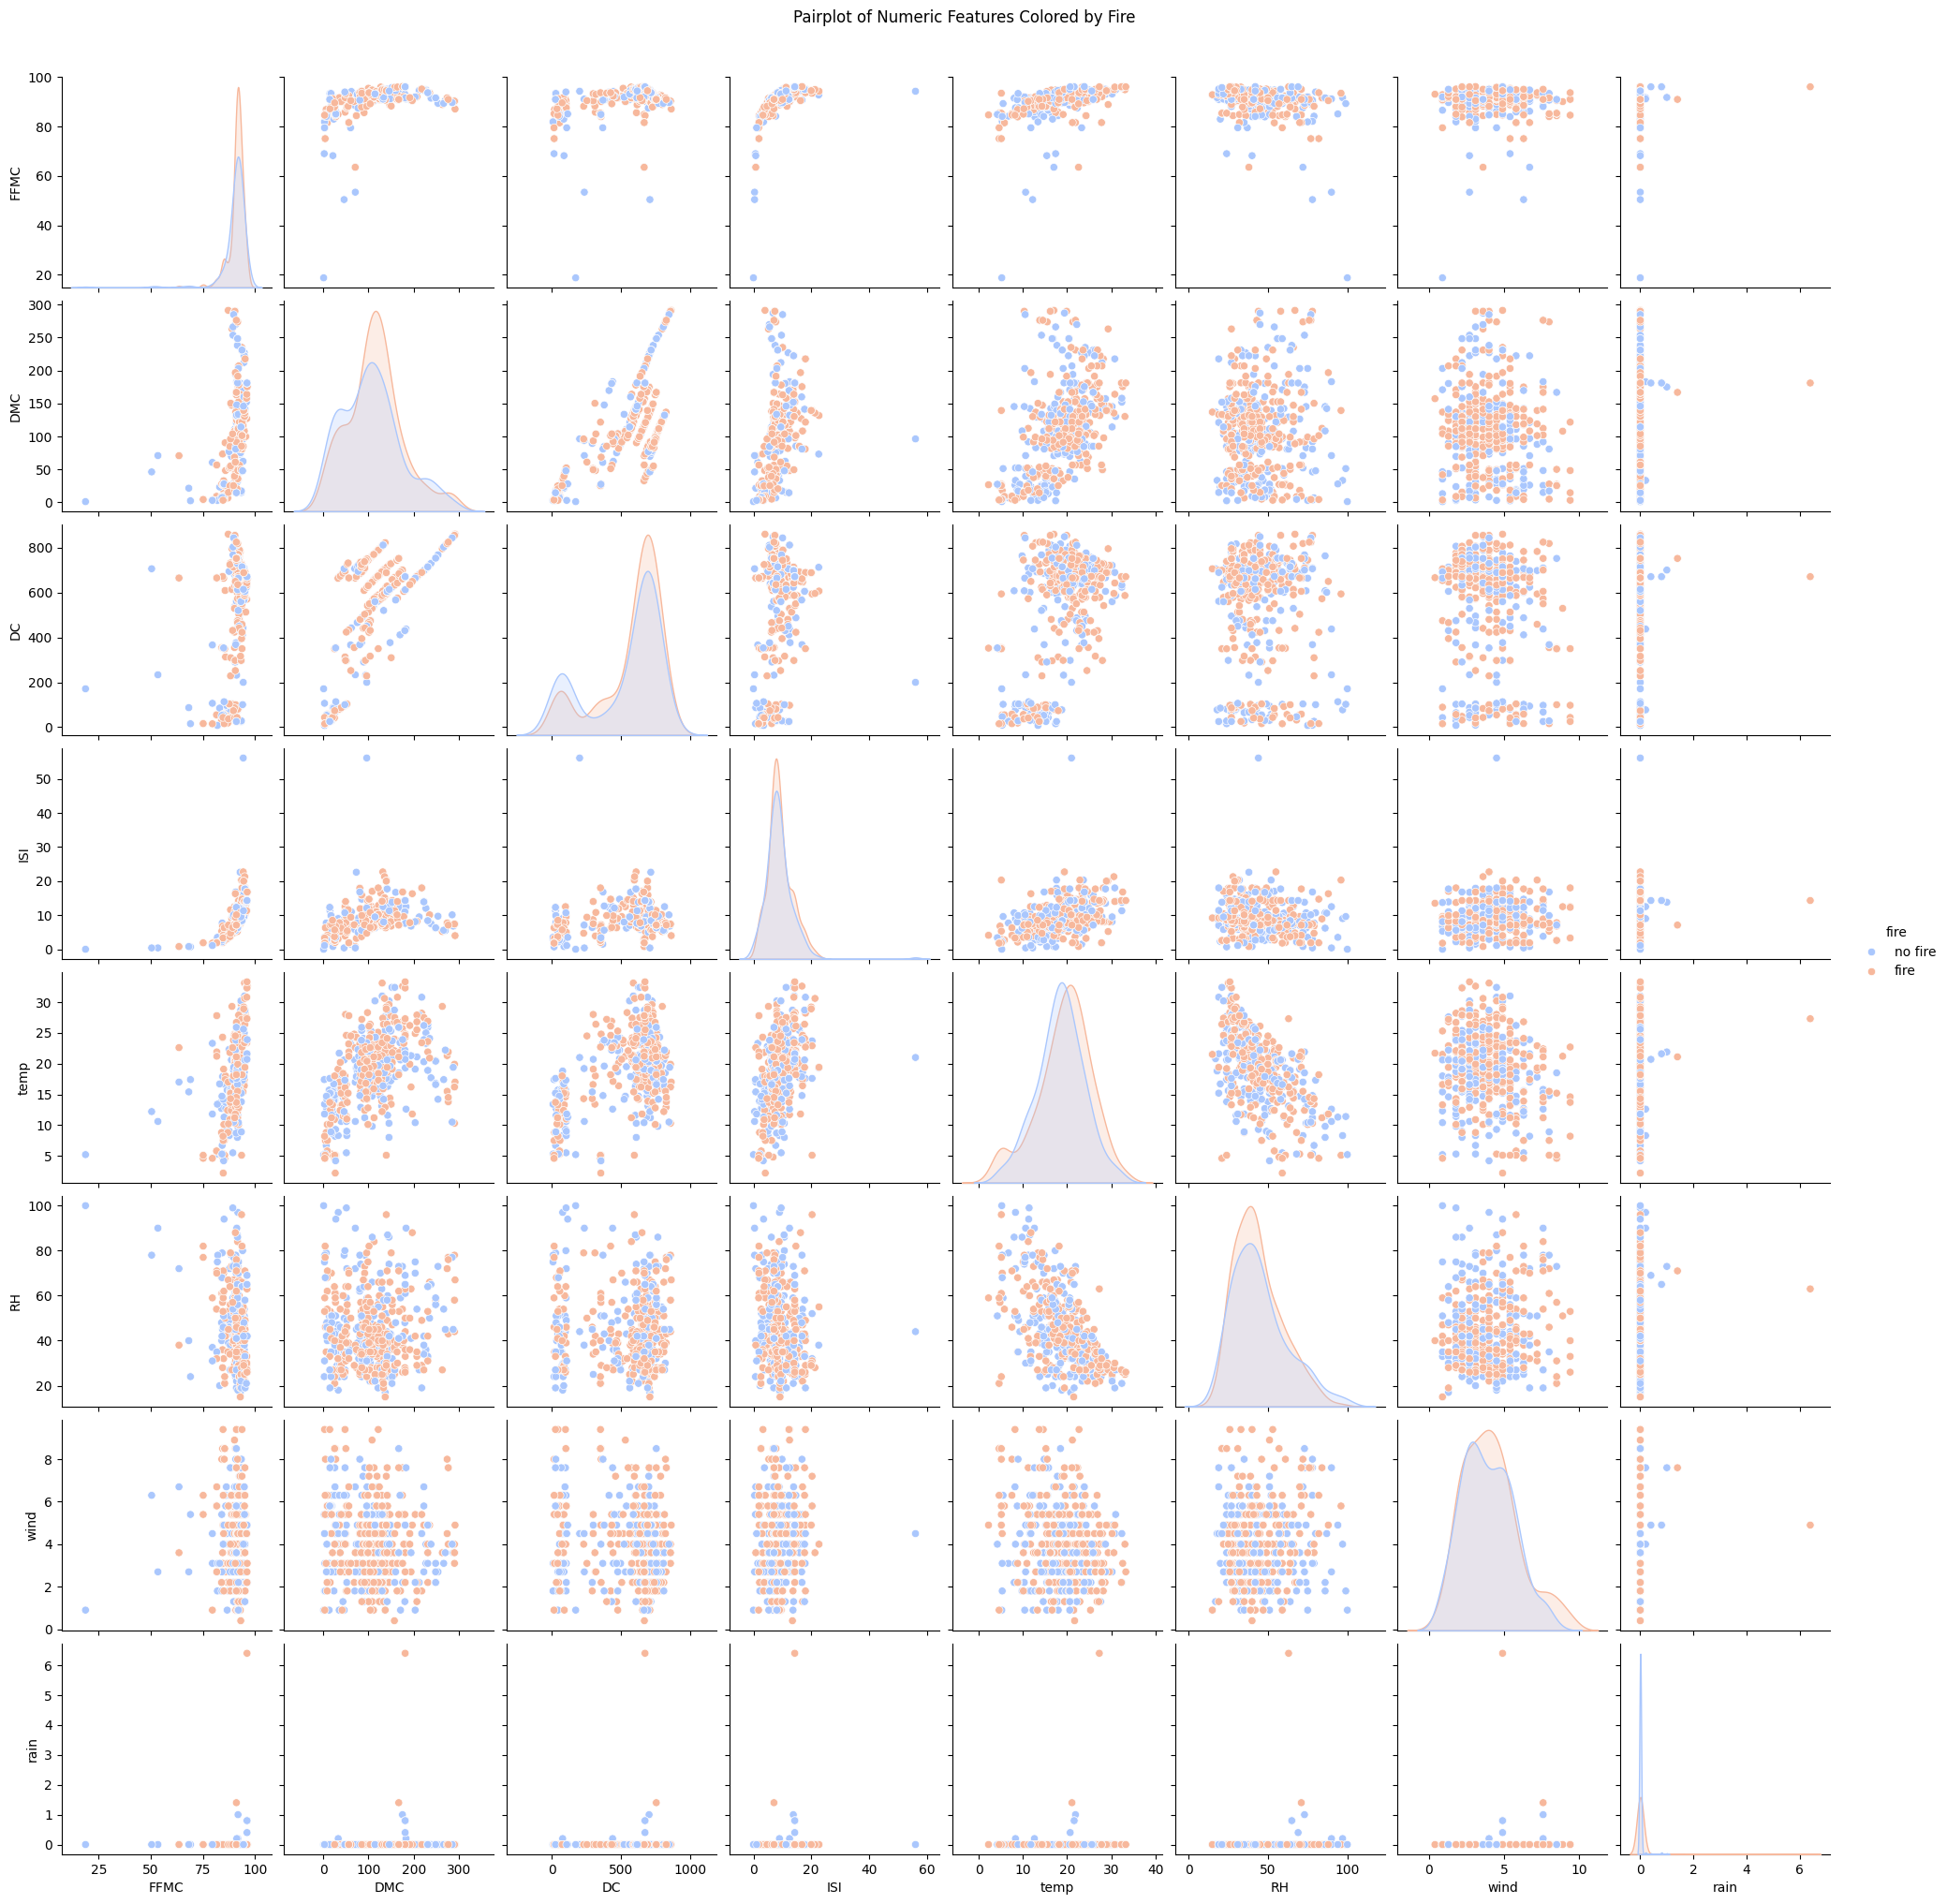

In [13]:
# Create the 'fire' column
df['fire'] = df['area'].apply(lambda x: 'fire' if x > 0 else 'no fire')

# Select numeric features for pairplot
numeric_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Include fire column for coloring
pairplot_cols = numeric_cols + ['fire']

# Create pairplot
sns.pairplot(df[pairplot_cols], hue='fire', palette='coolwarm', diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features Colored by Fire", y=1.02)
plt.show()

In [31]:
# Encode categorical columns
label_encoders = {}
categorical_cols = ['month', 'day']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features & target
X = df.drop('area', axis=1)   # predictors (all except area)
y = df['area']                # target (continuous)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale numeric columns
num_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                517 non-null    int64  
 1   Y                517 non-null    int64  
 2   month            517 non-null    int64  
 3   day              517 non-null    int64  
 4   FFMC             517 non-null    float64
 5   DMC              517 non-null    float64
 6   DC               517 non-null    float64
 7   ISI              517 non-null    float64
 8   temp             517 non-null    float64
 9   RH               517 non-null    int64  
 10  wind             517 non-null    float64
 11  rain             517 non-null    float64
 12  area             517 non-null    float64
 13  fire_occurrence  517 non-null    int64  
dtypes: float64(8), int64(6)
memory usage: 56.7 KB


In [33]:

# Create binary target (fire occurred or not)
df['fire_occurrence'] = (df['area'] > 0).astype(int)

# Encode categorical columns
label_encoders = {}
categorical_cols = ['month', 'day']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features & target
X = df.drop(['area', 'fire_occurrence'], axis=1)  # predictors
y = df['fire_occurrence']                         # target (binary)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numeric columns
num_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [34]:
X_train


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
475,2,5,6,4,0.680665,0.179922,-0.780849,1.907582,0.693186,-0.288442,2.988150,-0.075233
399,9,5,6,6,0.587109,-0.946402,-0.990701,1.050615,1.625198,-0.656874,0.238585,-0.075233
122,3,4,11,3,0.376606,0.217362,0.540221,-0.127715,0.658016,-0.165631,0.743607,-0.075233
216,4,4,11,3,0.376606,0.217362,0.540221,-0.127715,-0.326751,0.939665,-1.557050,-0.075233
209,8,3,11,4,0.680665,-0.456560,0.558208,1.886157,0.781112,-1.148116,0.463039,-0.075233
...,...,...,...,...,...,...,...,...,...,...,...,...
463,6,5,3,5,-3.669726,-1.649965,-2.115908,-1.541711,-2.489722,2.290583,1.248629,-0.075233
164,8,5,11,3,-0.254903,-0.314600,0.634954,-0.920410,-0.168485,1.369503,-1.052028,-0.075233
238,6,5,11,2,0.399995,0.170562,0.515039,-0.106291,1.115229,-1.086711,-0.041983,-0.075233
22,7,4,6,3,0.821001,-0.216320,-1.381226,10.070192,0.394239,-0.042820,0.238585,-0.075233


In [44]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [45]:
# Logistic Regression
lr = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

C:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)


--- Random Forest Evaluation ---
Accuracy: 0.9903846153846154
Classification Report:
               precision    recall  f1-score   support

           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00        35
           1       0.94      1.00      0.97        17
           0       1.00      1.00      1.00        50

    accuracy                           0.99       104
   macro avg       0.99      0.88      0.91       104
weighted avg       0.99      0.99      0.99       104



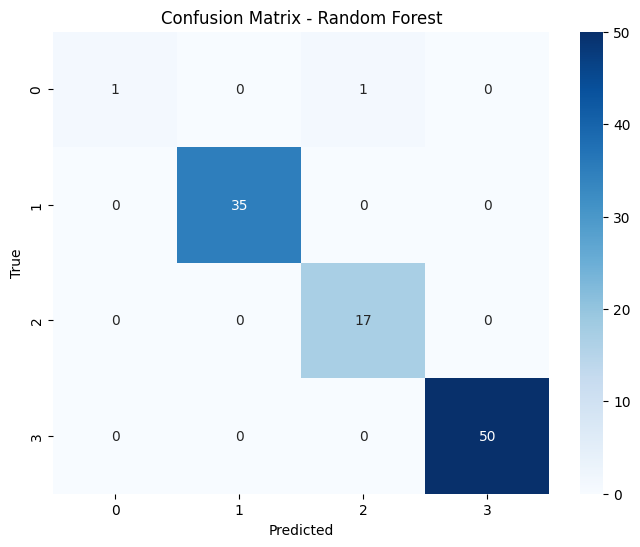


--- Logistic Regression Evaluation ---
Accuracy: 0.9134615384615384
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00         2
           3       0.80      1.00      0.89        35
           1       1.00      0.47      0.64        17
           0       1.00      1.00      1.00        50

    accuracy                           0.91       104
   macro avg       0.95      0.87      0.88       104
weighted avg       0.93      0.91      0.90       104



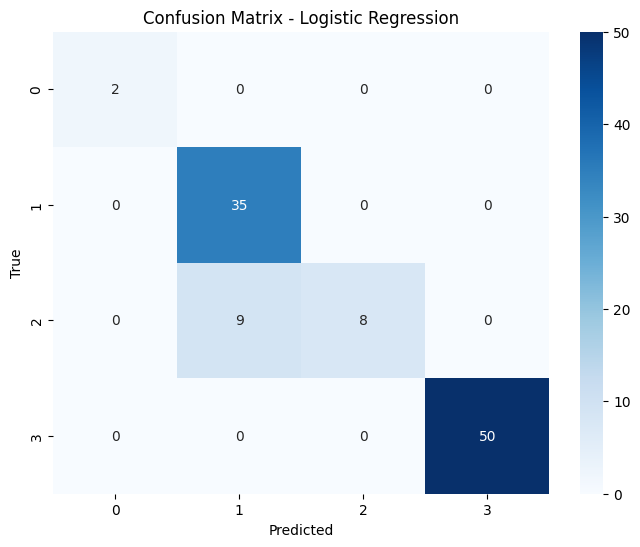

In [47]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates a trained machine learning model on test data.
    
    Args:
        model: The trained scikit-learn model.
        X_test (pd.DataFrame): The test feature set.
        y_test (pd.Series): The true labels for the test set.
        model_name (str): The name of the model for display.
    """
    y_pred = model.predict(X_test)
    
    print(f"\n--- {model_name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Check if target names are available for classification report
    try:
        target_names = [str(label) for label in y_test.unique()]
    except:
        target_names = None
        
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
    
    # Plotting the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate both models, assuming 'rf' and 'lr' are already trained
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(lr, X_test, y_test, "Logistic Regression")

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Evaluating Tuned Random Forest:

--- Tuned Random Forest Evaluation ---
Accuracy: 0.9903846153846154
Classification Report:
               precision    recall  f1-score   support

           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00        35
           1       0.94      1.00      0.97        17
           0       1.00      1.00      1.00        50

    accuracy                           0.99       104
   macro avg       0.99      0.88      0.91       104
weighted avg       0.99      0.99      0.99       104



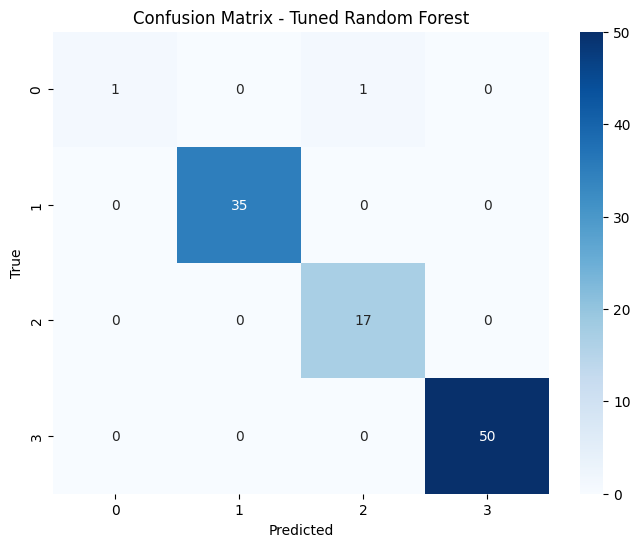

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best estimator (the best-performing model)
best_rf = grid_search.best_estimator_

# Evaluate the tuned model on the test set
print("\nEvaluating Tuned Random Forest:")
evaluate_model(best_rf, X_test, y_test, "Tuned Random Forest")

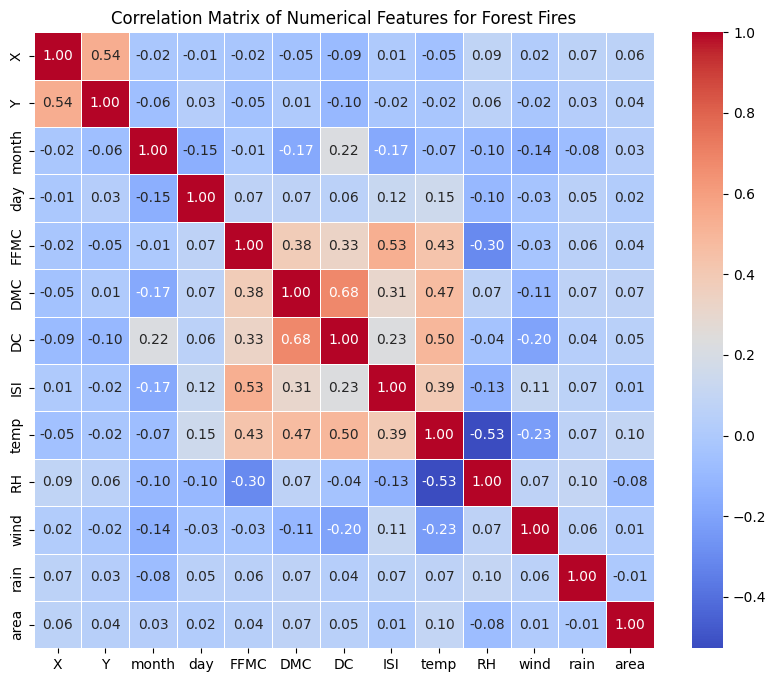

Correlation Matrix:
              X         Y     month       day      FFMC       DMC        DC  \
X      1.000000  0.539548 -0.017303 -0.009129 -0.021039 -0.048384 -0.085916   
Y      0.539548  1.000000 -0.062162  0.030100 -0.046308  0.007782 -0.101178   
month -0.017303 -0.062162  1.000000 -0.150982 -0.007636 -0.173152  0.219439   
day   -0.009129  0.030100 -0.150982  1.000000  0.074914  0.070218  0.058737   
FFMC  -0.021039 -0.046308 -0.007636  0.074914  1.000000  0.382619  0.330512   
DMC   -0.048384  0.007782 -0.173152  0.070218  0.382619  1.000000  0.682192   
DC    -0.085916 -0.101178  0.219439  0.058737  0.330512  0.682192  1.000000   
ISI    0.006210 -0.024488 -0.172087  0.117738  0.531805  0.305128  0.229154   
temp  -0.051258 -0.024103 -0.073802  0.148672  0.431532  0.469594  0.496208   
RH     0.085223  0.062221 -0.102057 -0.103389 -0.300995  0.073795 -0.039192   
wind   0.018798 -0.020341 -0.141131 -0.034504 -0.028485 -0.105342 -0.203466   
rain   0.065387  0.033234 -0.076

In [49]:
# Create a copy to avoid modifying the original DataFrame
df_corr = df.copy()

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['month', 'day']
for col in categorical_cols:
    df_corr[col] = le.fit_transform(df_corr[col])
corr_cols = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

# Compute the correlation matrix
corr_matrix = df_corr[corr_cols].corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features for Forest Fires')
plt.show()

# Optional: Display the correlation matrix values
print("Correlation Matrix:")
print(corr_matrix)   

In [50]:
joblib.dump(rf, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']